**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

**Exploring the dataset**

In [23]:
from google.colab import files
  
  
uploaded = files.upload()

Saving train.csv to train (3).csv


In [24]:
titanic= pd.read_csv(io.BytesIO(uploaded['train.csv']))
print(titanic)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Building pivot tables**

In [52]:
# single indexing
table=pd.pivot_table(titanic,index='Survived')
table

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


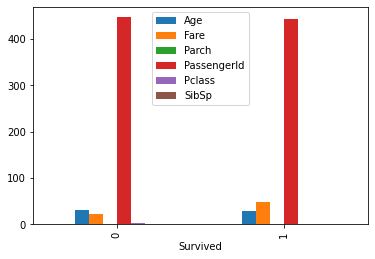

In [53]:
table.plot(kind='bar')

In [30]:
# Multiple indexing
table=pd.pivot_table(titanic,index=['Survived','Sex'])
table

Age       Fare  ...    Pclass     SibSp
Survived Sex                           ...                    
0        female  25.046875  23.024385  ...  2.851852  1.209877
         male    31.618056  21.960993  ...  2.476496  0.440171
1        female  28.847716  51.938573  ...  1.918455  0.515021
         male    27.276022  40.821484  ...  2.018349  0.385321

[4 rows x 6 columns]

**Using aggregation functions**

In [37]:
table=pd.pivot_table(titanic,index=['Survived','Sex'],aggfunc={'Age':np.mean,'Pclass':np.sum})
table

Age  Pclass
Survived Sex                      
0        female  25.046875     231
         male    31.618056    1159
1        female  28.847716     447
         male    27.276022     220

**Aggregation on specific features using values parameter**

In [42]:
table=pd.pivot_table(titanic,index=['Survived','Sex'],values=['Pclass'],aggfunc=np.mean)
table

Pclass
Survived Sex             
0        female  2.851852
         male    2.476496
1        female  1.918455
         male    2.018349

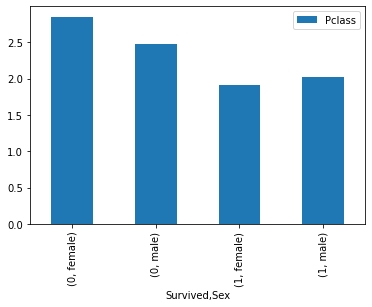

In [47]:
table.plot(kind='bar')

**Columns parametert**

In [56]:
table= pd.pivot_table(titanic,index=['Survived'],columns=['Sex'],values=['Pclass'],aggfunc=np.mean)
table

Pclass          
Sex         female      male
Survived                    
0         2.851852  2.476496
1         1.918455  2.018349

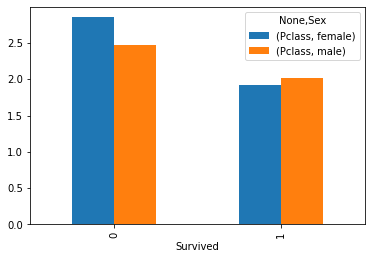

In [58]:
table.plot(kind='bar')

**Handling missing data**

In [65]:
table=pd.pivot_table(titanic,index=['Sex','Pclass','Survived'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table

Age                      
Embarked                        C          Q          S
Sex    Pclass Survived                                 
female 1      0         50.000000        NaN  13.500000
              1         35.675676  33.000000  33.619048
       2      0               NaN        NaN  36.000000
              1         19.142857  30.000000  29.091667
       3      0         20.700000  28.100000  23.688889
              1         11.045455  17.600000  22.548387
male   1      0         43.050000  44.000000  45.362500
              1         36.437500        NaN  36.121667
       2      0         29.500000  57.000000  33.414474
              1          1.000000        NaN  17.095000
       3      0         27.555556  28.076923  27.168478
              1         18.488571  29.000000  22.933333

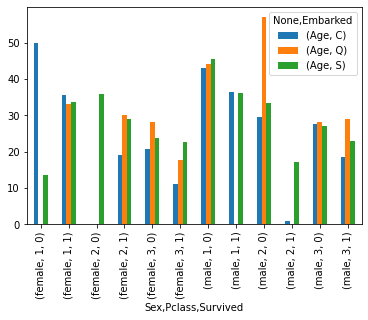

In [66]:
table.plot(kind='bar')

In [67]:
table=pd.pivot_table(titanic,index=['Sex','Pclass','Survived'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(titanic['Age']))
table

Age                      
Embarked                        C          Q          S
Sex    Pclass Survived                                 
female 1      0         50.000000  29.699118  13.500000
              1         35.675676  33.000000  33.619048
       2      0         29.699118  29.699118  36.000000
              1         19.142857  30.000000  29.091667
       3      0         20.700000  28.100000  23.688889
              1         11.045455  17.600000  22.548387
male   1      0         43.050000  44.000000  45.362500
              1         36.437500  29.699118  36.121667
       2      0         29.500000  57.000000  33.414474
              1          1.000000  29.699118  17.095000
       3      0         27.555556  28.076923  27.168478
              1         18.488571  29.000000  22.933333